# Boosting

## Importation des librairies

In [1]:
# Librairies de base
import os
import random
import numpy as np

# Graphes
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.tree import export_graphviz
from IPython.display import Image

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Eviter les Deprecated warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Création et affichage des données

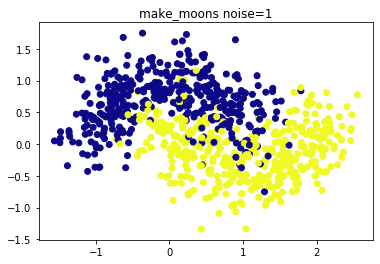

In [2]:
X, y = make_moons(n_samples=800, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
plt.scatter(X[:,0],X[:,1], c = y,cmap='plasma');
plt.title('make_moons noise=1')
plt.show()

# Création du modèle et apprentissage

In [3]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.3, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

## Affichage d'un arbre aléatoire

Arbre N° 63


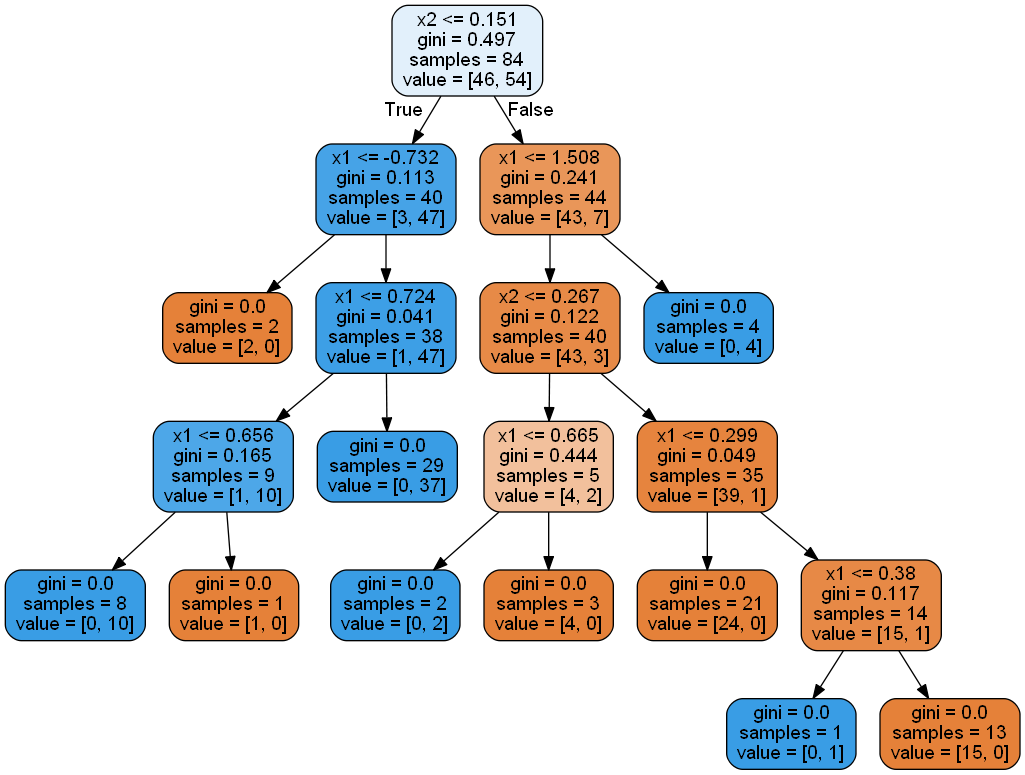

In [4]:
rd_tree=random.randint(0,99)
print('Arbre N°',rd_tree)

export_graphviz(ada_clf.estimators_[rd_tree],
                feature_names=['x1','x2'],
                filled=True,
                rounded=True)

#appel à la fonction dot de graphwiz
os.system("dot -Tpng tree.dot -o tree.png")    
#Affichage de l'image créée
Image("tree.png")

## Affichage Apprentissage

In [5]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True,showlabel=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if showlabel:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", alpha=alpha)
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ys", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

score Adaboost : 0.91


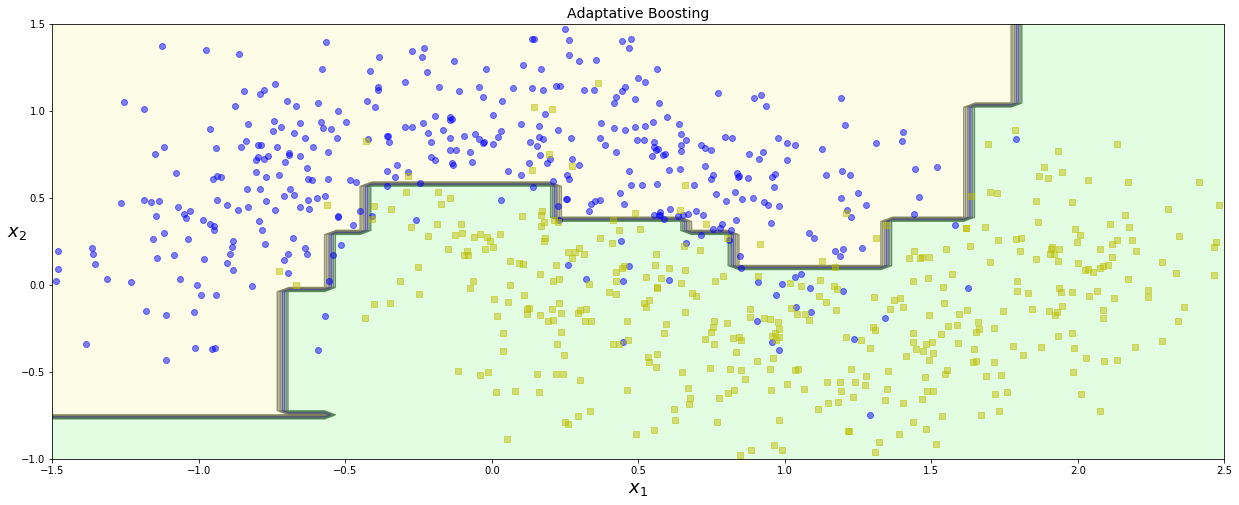

In [6]:
y_pred_ada = ada_clf.predict(X_test)
print('score Adaboost :' , accuracy_score(y_test, y_pred_ada))
plt.figure(figsize=(21,8))
plot_decision_boundary(ada_clf, X, y)
plt.title("Adaptative Boosting", fontsize=14)
plt.show()

## Exemple Gradient Boosting avec Early stopping

In [7]:
#On passe à 80000 pour mieux voir, sinon on aura trop peu d'itérations
X, y = make_moons(n_samples=80000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

# warm_start=True permet de garder l'ensemble puis de le relancer
gb_clf = GradientBoostingClassifier(max_depth=2, warm_start=True, random_state=42)
min_val_error = float("inf")
error_going_up = 0
# Test jusqu'à 50 estimateurs
for n_estimators in range(1, 50):    
    gb_clf.n_estimators = n_estimators
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)
    val_error = accuracy_score(y_test, y_pred)
    print(n_estimators,':',val_error)
    # Test de la variation de l'erreur
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        #Si plus de 5 augmentations, on sort.
        if error_going_up == 5:
            print('nombre optimal estimateur:', n_estimators)
            break  # early stopping
gb_clf 

1 : 0.88835
2 : 0.88835
3 : 0.88825
4 : 0.88825
5 : 0.8882
6 : 0.8882
7 : 0.88815
8 : 0.88815
9 : 0.8881
10 : 0.8881
11 : 0.88805
12 : 0.8882
13 : 0.88855
14 : 0.88845
15 : 0.8889
16 : 0.8884
nombre optimal estimateur: 16


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=16,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

## Affichage Résultat Gradient Boosting

score Gradient Boosting : 0.8884


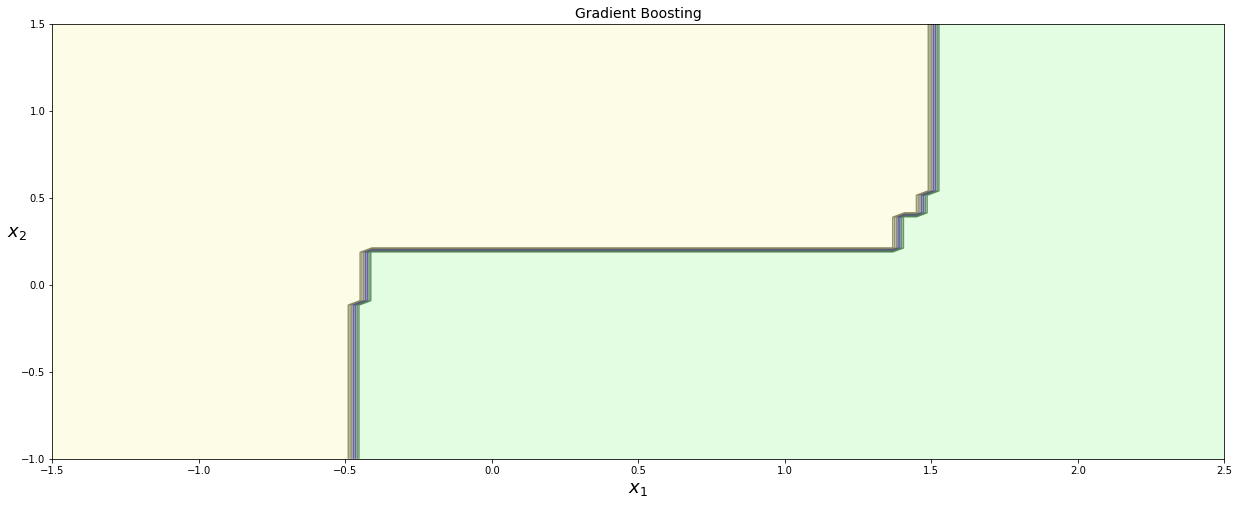

In [12]:
y_pred_gradient = gb_clf.predict(X_test)    
print('score Gradient Boosting :' , accuracy_score(y_test, y_pred_gradient))
plt.figure(figsize=(21,8))
plot_decision_boundary(gb_clf, X, y,showlabel=False)
plt.title("Gradient Boosting", fontsize=14)
plt.show()